# Earphones Review 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
# for regex function
import re
import nltk #natural language toolkit
from nltk.corpus import stopwords
import textblob
from textblob import Word 
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Loading the dataset

In [2]:
df=pd.read_csv('earphone.csv')

In [3]:
df

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255
...,...,...,...,...
14332,Good\n,Good\n,4,JBL T110BT
14333,Amazing Product\n,An amazing product but a bit costly.\n,5,JBL T110BT
14334,Not bad\n,Sound\n,1,JBL T110BT
14335,a good product\n,the sound is good battery life is good but the...,5,JBL T110BT


In [4]:
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [5]:
df.shape

(14337, 4)

In [6]:
df=df.drop(['ReviewTitle','Product'],axis=1)


In [7]:
df

,ReviewBody,ReviewStar
0,No doubt it has a great bass and to a great ex...,3
1,"This earphones are unreliable, i bought it be...",1
2,"i bought itfor 999,I purchased it second time,...",4
3,Its sound quality is adorable. overall it was ...,1
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5
...,...,...
14332,Good\n,4
14333,An amazing product but a bit costly.\n,5
14334,Sound\n,1
14335,the sound is good battery life is good but the...,5


In [8]:
df.shape  #give dimensions

(14337, 2)

In [9]:
df.isna().sum()


ReviewBody    0
ReviewStar    0
dtype: int64

In [10]:
df.duplicated().sum()

1185

In [11]:
df = df.drop_duplicates()
df.shape

(13152, 2)

In [12]:
df.head()

,ReviewBody,ReviewStar
0,No doubt it has a great bass and to a great ex...,3
1,"This earphones are unreliable, i bought it be...",1
2,"i bought itfor 999,I purchased it second time,...",4
3,Its sound quality is adorable. overall it was ...,1
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5


In [13]:
df['ReviewStar'].value_counts()

5    5418
4    2949
1    2412
3    1451
2     922
Name: ReviewStar, dtype: int64

In [14]:
def sentiment(x):
    if int(x)<5:
        return 1
    else:
        return 0

In [15]:
df["ReviewStar"] = df["ReviewStar"].apply(sentiment)        #to apply the above function

In [16]:
df.head()

,ReviewBody,ReviewStar
0,No doubt it has a great bass and to a great ex...,1
1,"This earphones are unreliable, i bought it be...",1
2,"i bought itfor 999,I purchased it second time,...",1
3,Its sound quality is adorable. overall it was ...,1
4,Its Awesome... Good sound quality & 8-9 hrs ba...,0


#  Cleaning the dataset

In [17]:
#lambda is used for function object 
df["ReviewBody"] = df["ReviewBody"].apply(lambda x: x.lower())
df['ReviewBody'] = df['ReviewBody'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
df['ReviewBody'] = df['ReviewBody'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))
df['ReviewBody'] = df['ReviewBody'].apply(lambda x: x.strip())

In [18]:
df.head()

,ReviewBody,ReviewStar
0,no doubt it has a great bass and to a great ex...,1
1,this earphones are unreliable i bought it bef...,1
2,i bought itfor i purchased it second time g...,1
3,its sound quality is adorable overall it was g...,1
4,its awesome good sound quality hrs batte...,0


In [19]:
delete=pd.Series(" ".join(df["ReviewBody"]).split()).value_counts()[-6000:]
df["ReviewBody"]=df["ReviewBody"].apply(lambda x: " ".join(x for x in x.split() if x not in delete))

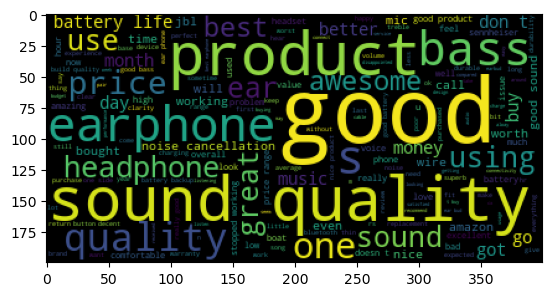

In [20]:
import wordcloud
import matplotlib.pyplot as plt
common_words=""
for i in df.ReviewBody:
    i=str(i)
    tokens=i.split()
    common_words += " ".join(tokens) + " "
wordcloud=wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud)
plt.show()

# Lemmatizing the Data

In [21]:
nltk.download('wordnet') #large database which return lexical form
df["ReviewBody"]=df["ReviewBody"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
df.head()

,ReviewBody,ReviewStar
0,no doubt it ha a great bass and to a great ext...,1
1,this earphone are unreliable i bought it befor...,1
2,i bought itfor i purchased it second time gift...,1
3,it sound quality is adorable overall it wa goo...,1
4,it awesome good sound quality hr battery life ...,0


# Stemming the data

In [23]:
nltk.download('punkt')
porter_stemmer = PorterStemmer()
df["ReviewBody"] = df["ReviewBody"].apply(lambda x: " ".join([porter_stemmer.stem(word) for word in x.split()]))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
#splitting the dataset  
train_x, test_x, y_train,y_test=train_test_split(df["ReviewBody"],
                                                 df["ReviewStar"],
                                                 test_size=0.20,
                                                 random_state=42)
print("X_train shape",train_x.shape)
print("y_train shape",test_x.shape)
print("X_test shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (10521,)
y_train shape (2631,)
X_test shape (10521,)
y_test shape (2631,)


In [25]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_ReviewBody=cv.fit_transform(train_x)
#transformed test reviews
cv_test_ReviewBody=cv.transform(test_x)

print('BOW_cv_train:',cv_train_ReviewBody.shape)
print('BOW_cv_test:',cv_test_ReviewBody.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (10521, 179179)
BOW_cv_test: (2631, 179179)


In [26]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_ReviewBody=tv.fit_transform(train_x)
#transformed test reviews
tv_test_ReviewBody=tv.transform(test_x)
print('Tfidf_train:',tv_train_ReviewBody.shape)
print('Tfidf_test:',tv_test_ReviewBody.shape)

Tfidf_train: (10521, 179179)
Tfidf_test: (2631, 179179)


# train the algorithm

In [27]:
from sklearn.linear_model import LogisticRegression
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_ReviewBody,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_ReviewBody,y_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [28]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_ReviewBody)
print(lr_bow_predict)
#Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_ReviewBody)
print(lr_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [29]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test, lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.5993918662105663
lr_tfidf_score : 0.5864690231851007


In [31]:
#for naive baye's
#training the model
from sklearn.naive_bayes import MultinomialNB    

mnb=MultinomialNB()
mnb_bow=mnb.fit(cv_train_ReviewBody,y_train)
print(mnb_bow)
mnb_tfidf=mnb.fit(tv_train_ReviewBody,y_train)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [32]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_ReviewBody)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_ReviewBody)
print(mnb_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [33]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.6145952109464082
mnb_tfidf_score : 0.6043329532497149
